In [2]:
%pylab
%matplotlib inline

import pickle

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

print(f'Using Tensorflow version: {tf.__version__}')

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
Using Tensorflow version: 1.3.0


In [3]:
with open('data/age_height.pkl', 'rb') as data:
    x_train = pickle.load(data)
    y_train = pickle.load(data)

## Handmade regression

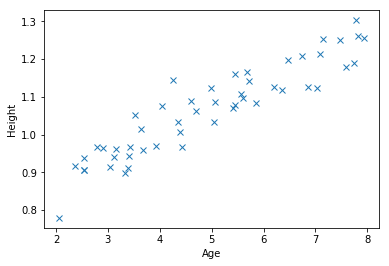

In [121]:
plt.plot(x_train, y_train, 'x')
plt.xlabel('Age')
plt.ylabel('Height')

In [122]:
W = tf.Variable([0], dtype=tf.float32)
b = tf.Variable([0], dtype=tf.float32)

x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)

loss = tf.reduce_sum(tf.square(linear_model - y))
optimizer = tf.train.GradientDescentOptimizer(0.0007)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
    
for _ in range(1000):
    sess.run(train, {x: x_train, y: y_train})
        
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

predictions = sess.run(linear_model, {x: x_train})

W: [ 0.06396713] b: [ 0.74969006] loss: 0.0987082


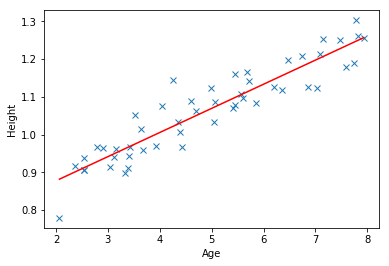

In [123]:
plt.xlabel('Age')
plt.ylabel('Height')
plt.plot(x_train, y_train, 'x')
plt.plot(x_train, predictions, 'r')

## With TF's estimators

In [143]:
feature_columns = [tf.feature_column.numeric_column("x", shape=[1])]
estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns)

train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=x_train.shape[0], num_epochs=1000, shuffle=False)
input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=x_train.shape[0], num_epochs=1, shuffle=False)

estimator.train(input_fn=train_input_fn, steps=1000)

# Here we evaluate how well our model did.
train_metrics = estimator.evaluate(input_fn=input_fn)
print("train metrics: %r"% train_metrics)

predictions = list(pred['predictions'] for pred in estimator.predict(input_fn=input_fn))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/3c/ghfnd0sd481dh25t0fg0dsy00000gn/T/tmp3gujgjw4', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/3c/ghfnd0sd481dh25t0fg0dsy00000gn/T/tmp3gujgjw4/model.ckpt.
INFO:tensorflow:loss = 57.3733, step = 1
INFO:tensorflow:global_step/sec: 689.754
INFO:tensorflow:loss = 0.162101, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 709.256
INFO:tensorflow:loss = 0.100922, step = 201 (0.141 sec)
INFO:tensorflow:global_step/sec: 740.615
INFO:tensorflow:loss = 0.0987845, step = 301 (0.135 sec)
INFO:tensorflow:global_step/sec: 655.019
INFO:tensorflow:loss = 0.0987097, step = 401 (0.153 sec)
INFO:tensorflow:global

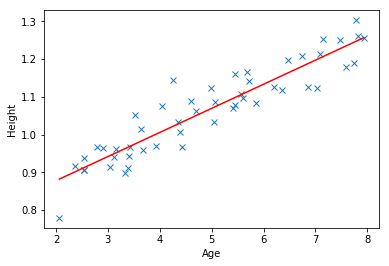

In [145]:
plt.xlabel('Age')
plt.ylabel('Height')
plt.plot(x_train, y_train, 'x')
plt.plot(x_train, predictions, 'r')